# ESM Study

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data
data = {
    'Date': [
        '19-09', '22-09', '24-09', '26-09', '29-09', '01-10', '03-10', '06-10',
        '8-10', '10-10', '13-10', '15-10', '17-10', '20-10', '22-10', '24-10', '27-10'
    ],
    'Mood': [1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, -1, 2, 1, 2],
    'Stress': [0, 0, 0, 1, 1, 0, 0, 0, 1, -1, 0, 1, 1, 1, 1, 1, 0],
    'Movement': [1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1],
    'WorkLifeBalance': [0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2],
    'Productivity': [1, 0, 0, 0, -1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2]
}

In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m')  # Convert dates to datetime format
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal for trendline plotting


In [ ]:

print("Descriptive Statistics:")
describe_df = df.describe()

percentage_within_25_75_range = {}
for column in df.columns[1:-1]:
    q1 = describe_df.loc['25%', column]
    q3 = describe_df.loc['75%', column]
    within_bounds = df[column].between(q1, q3).mean() * 100
    percentage_within_25_75_range[column] = within_bounds

describe_df.loc['Stability Envelope'] = percentage_within_25_75_range



describe_df.head(10)



Descriptive Statistics:


,Date,Mood,Stress,Movement,WorkLifeBalance,Productivity,Date_ordinal
count,17,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1900-10-08 00:00:00,0.941176,0.411765,1.058824,0.882353,0.823529,693876.000000
min,1900-09-19 00:00:00,-1.000000,-1.000000,0.000000,0.000000,-1.000000,693857.000000
25%,1900-09-29 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,693867.000000
50%,1900-10-08 00:00:00,1.000000,0.000000,1.000000,1.000000,1.000000,693876.000000
75%,1900-10-17 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,693885.000000
max,1900-10-27 00:00:00,2.000000,1.000000,2.000000,2.000000,2.000000,693895.000000
std,NaN,0.826936,0.618347,0.555719,0.781213,0.882843,11.811012
Stability Envelope,NaN,52.941176,94.117647,70.588235,76.470588,70.588235,NaN


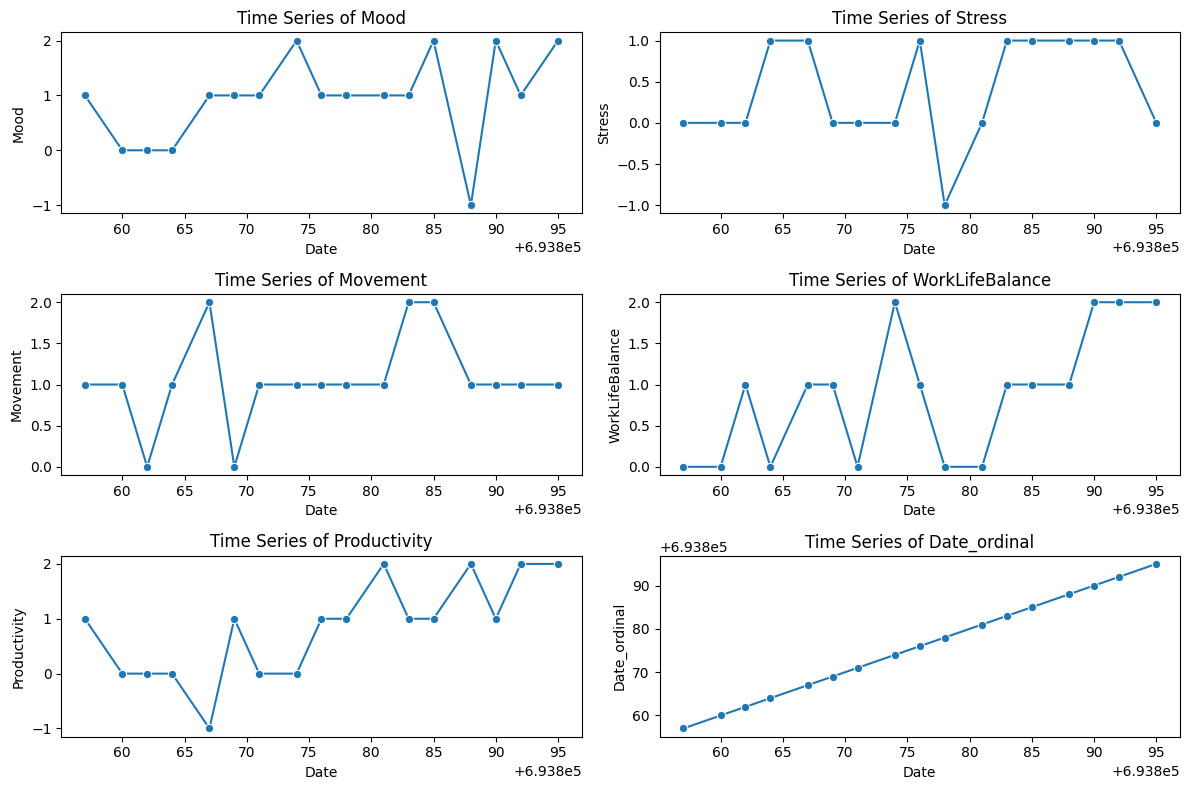

In [ ]:
# Time Series Plots for each variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='Date_ordinal', y=column, data=df, marker='o')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
plt.tight_layout()
plt.show()



Correlation Matrix:
                     Mood    Stress  Movement  WorkLifeBalance  Productivity  \
Mood             1.000000 -0.071900  0.280009         0.472354      0.070502   
Stress          -0.071900  1.000000  0.470757         0.365318      0.026939   
Movement         0.280009  0.470757  1.000000         0.016937     -0.104911   
WorkLifeBalance  0.472354  0.365318  0.016937         1.000000      0.239878   
Productivity     0.070502  0.026939 -0.104911         0.239878      1.000000   
Date_ordinal     0.371150  0.299522  0.266622         0.623177      0.713274   

                 Date_ordinal  
Mood                 0.371150  
Stress               0.299522  
Movement             0.266622  
WorkLifeBalance      0.623177  
Productivity         0.713274  
Date_ordinal         1.000000  


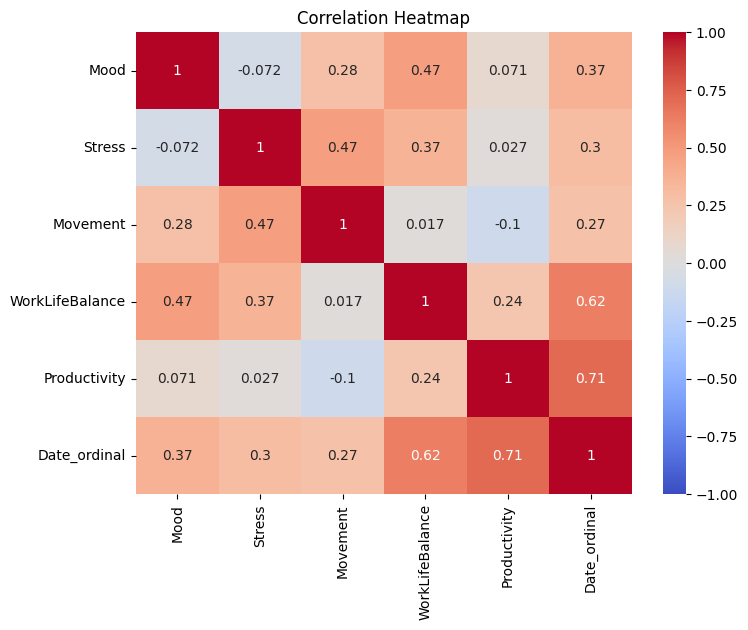

In [ ]:
# Correlation Analysis
correlation_matrix = df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
mood_positive = df[df['Mood'] > 0].mean()
mood_non_positive = df[df['Mood'] <= 0].mean()

print("\nAverage values when Mood is positive:")
print(mood_positive)
print("\nAverage values when Mood is non-positive:")
print(mood_non_positive)


Average values when Mood is positive:
Date               1900-10-10 07:23:04.615384576
Mood                                    1.307692
Stress                                  0.384615
Movement                                1.153846
WorkLifeBalance                              1.0
Productivity                            0.923077
Date_ordinal                       693878.307692
dtype: object

Average values when Mood is non-positive:
Date               1900-09-30 12:00:00
Mood                             -0.25
Stress                             0.5
Movement                          0.75
WorkLifeBalance                    0.5
Productivity                       0.5
Date_ordinal                  693868.5
dtype: object


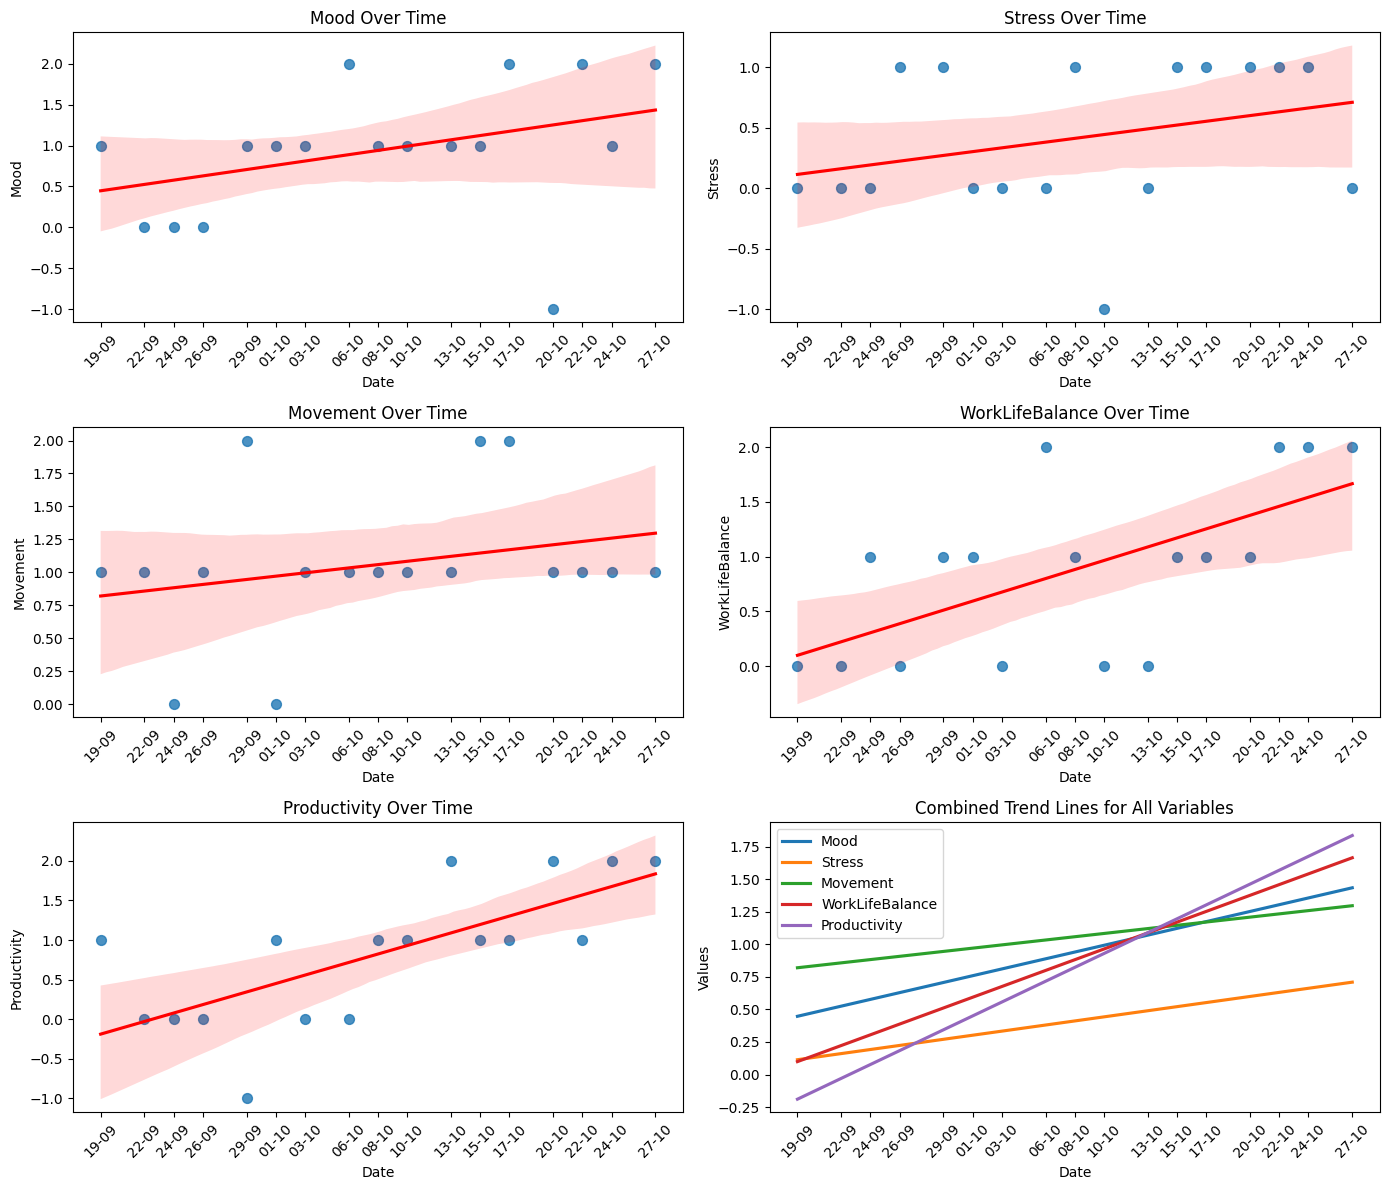

In [ ]:
# Create scatter plots with trend lines for each variable
plt.figure(figsize=(14, 12))
for i, column in enumerate(df.columns[1:-1], 1):  # Excluding 'Date' and 'Date_ordinal' columns
    plt.subplot(3, 2, i)
    sns.regplot(x='Date_ordinal', y=column, data=df, scatter_kws={'s': 50}, line_kws={"color": "red"})
    plt.title(f'{column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    # Set x-ticks to show actual dates instead of ordinal
    plt.xticks(df['Date_ordinal'], df['Date'].dt.strftime('%d-%m'), rotation=45)

# Combined plot with only trend lines
plt.subplot(3, 2, 6)
for column in df.columns[1:-1]:  # Excluding 'Date' and 'Date_ordinal' columns
    sns.regplot(x='Date_ordinal', y=column, data=df, label=column, line_kws={"color": sns.color_palette("tab10")[df.columns[1:-1].get_loc(column)]}, scatter=False, ci=None)
plt.title('Combined Trend Lines for All Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(df['Date_ordinal'], df['Date'].dt.strftime('%d-%m'), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()